In [4]:
import pandas as pd

In [5]:
# read the csv file 
df=pd.read_csv("D:/DSP/diabetes_dataset.csv")

In [7]:
df.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [6]:
# droping the target data and store other feature in x
x=df.drop(['Outcome'], axis=1)

In [7]:
# store the target data in y
y=df.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [9]:
#using the decision tree classifier
# import the dtc from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [10]:
# splitting the data into training and test
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)

In [11]:
#initializing the model 
model=DecisionTreeClassifier()

In [12]:
model

DecisionTreeClassifier()

In [13]:
# train the model
model=model.fit(x_train,y_train)

In [14]:
print(model)

DecisionTreeClassifier()


In [15]:
# predict the test set
y_pred=model.predict(x_test)

In [16]:
# evluating 
from sklearn import metrics
print("ACCURACY:",metrics.accuracy_score(y_test,y_pred)*100)

ACCURACY: 72.07792207792207


In [17]:
# CONFUSION MATRIX
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
confusion_matrix(y_test,y_pred)

array([[80, 19],
       [24, 31]], dtype=int64)

In [18]:
from sklearn.metrics import classification_report

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        99
           1       0.62      0.56      0.59        55

    accuracy                           0.72       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154



In [20]:
model.predict([[6,148,72,35,0,33.6,0.627,50]])

c:\Users\keerthana\anaconda3\envs\dsp\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [22]:
features=x.columns
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [32]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming 'model' is your trained decision tree model and 'features' are your feature names
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, rounded=True, feature_names=features, class_names=['0', '1'])
plt.show()

In [54]:
# using entropy
model=DecisionTreeClassifier(criterion='entropy',max_depth=4)
#train
modelnew=model.fit(x_train,y_train)

In [55]:
y_pred=modelnew.predict(x_test)

In [56]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 79.87012987012987


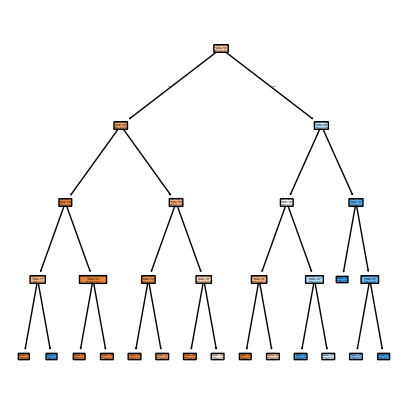

In [57]:
plt.figure(figsize=(5,5))
plot_tree(modelnew, filled=True, rounded=True, feature_names=features, class_names=['0', '1'])
plt.show()